1. Winrate to First blood as percentage
2. Number of inhibitor to dragonKills, dot graph correlation
3. Most Baron Kills, Num of occurance
4. Winrate on Each side

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter 

lose = pd.read_csv('match_loser_data_version1.csv')
win = pd.read_csv('match_winner_data_version1.csv')


1. Winrate to First Blood

In [2]:
firstBlood = win.loc[win['firstBlood'] == True]
print("First blood converted to win is", len(firstBlood)/len(win)*100,'%')


First blood converted to win is 60.23210725082468 %


2. Number of inhibitor to dragon killed


Counter({(1, 4): 11762, (1, 3): 11703, (0, 2): 10436, (0, 3): 7253, (1, 0): 7178, (2, 4): 6856, (1, 2): 6850, (1, 5): 5571, (2, 3): 5548, (2, 0): 5084, (1, 1): 3843, (0, 1): 3556, (2, 5): 3290, (2, 2): 2480, (0, 4): 2401, (3, 4): 2302, (0, 0): 2041, (3, 3): 1465, (3, 5): 1447, (1, 6): 1365, (3, 0): 994, (2, 6): 868, (2, 1): 611, (0, 5): 504, (3, 2): 487, (4, 4): 481, (4, 5): 454, (3, 6): 388, (4, 3): 188, (1, 7): 183, (4, 6): 171, (3, 1): 127, (2, 7): 122, (5, 5): 116, (5, 4): 104, (5, 6): 88, (4, 0): 88, (0, 6): 81, (3, 7): 69, (4, 2): 39, (4, 7): 33, (6, 5): 28, (6, 6): 24, (5, 3): 22, (5, 7): 20, (0, 7): 11, (5, 2): 11, (1, 8): 10, (6, 4): 10, (6, 7): 10, (4, 1): 6, (7, 6): 6, (4, 8): 5, (7, 5): 5, (7, 7): 4, (6, 3): 4, (2, 8): 4, (3, 8): 3, (7, 3): 3, (7, 8): 3, (7, 4): 2, (5, 0): 2, (9, 5): 1, (9, 7): 1, (10, 9): 1, (8, 5): 1, (5, 1): 1, (5, 8): 1, (6, 2): 1, (8, 6): 1, (8, 7): 1})


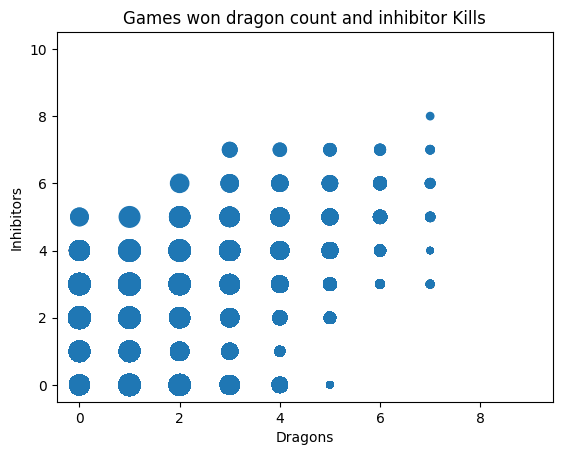

In [25]:
inhib = win['inhibitorKills'].tolist()
dragon = []
for i in range(len(win)):
    dragon.append(win.loc[i,'dragonKills']+lose.loc[i,'dragonKills'])

combos = list(zip(inhib, dragon))
weight_counter = Counter(combos)
print(weight_counter)
weights = [weight_counter[(dragon[i], inhib[i])] for i, _ in enumerate(dragon)]
for i in range(len(weights)):
    try:
        weights[i] = math.log(weights[i],1.04)
    except:
        weights[i] = 0
plt.scatter(dragon, inhib, s=weights)
plt.xlabel('Dragons')
plt.ylabel('Inhibitors')
plt.title('Games won dragon count and inhibitor Kills')
plt.show()

Most Baron Kills

In [33]:
print("Most Baron Taken in won game: ", max(win['baronKills'].tolist()), "Occured", win['baronKills'].tolist().count(max(win['baronKills'].tolist())), "times")
print("Most Baron Taken in lost game: ", max(lose['baronKills'].tolist()), "Occured", lose['baronKills'].tolist().count(max(lose['baronKills'].tolist())), "times")
barons = []
for i in range(len(win)):
    barons.append(win.loc[i,'baronKills']+lose.loc[i,'baronKills'])
print(barons)
print("Most Baron Taken in one game", max(barons), "Occured", barons.count(max(barons)), "times")

Most Baron Taken in won game:  5 Occured 2 times
Most Baron Taken in lost game:  4 Occured 3 times
[0, 0, 0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 3, 3, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 4, 1, 0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 

Winrate of Blue and Red Side

In [34]:
print("Winrate on Blue Side:", (win["baronKills"].tolist().count(100)/len(win["baronKills"].tolist()+lose["baronKills"].tolist())))
print("Winrate on Blue Side:", (lose["baronKills"].tolist().count(100)/len(win["baronKills"].tolist()+lose["baronKills"].tolist())))

SyntaxError: EOL while scanning string literal (4270524653.py, line 1)

In [ ]:
""